In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import requests
import json
from bs4 import BeautifulSoup as bs
Details = []
#reqURL = 'http://feeds.bbci.co.uk/news/technology/rss.xml'
#reqURL = 'http://feeds.bbci.co.uk/news/business/rss.xml'
#reqURL = 'http://feeds.bbci.co.uk/sport/football/rss.xml?edition=uk'
#reqURL = 'http://feeds.bbci.co.uk/news/science_and_environment/rss.xml?edition=uk'
#reqURL = 'https://feeds.skynews.com/feeds/rss/politics.xml'
#reqURL = 'https://feeds.skynews.com/feeds/rss/technology.xml'
#reqURL = 'https://feeds.skynews.com/feeds/rss/business.xml'
#reqURL = 'https://feeds.skynews.com/feeds/rss/entertainment.xml'
reqURL = 'http://feeds.bbci.co.uk/news/entertainment_and_arts/rss.xml?edition=uk'
if(reqURL != None and reqURL != '/'):
    description = bs(requests.get(
                                    reqURL.strip()
                                ).text,
                    'html.parser'
                    ).findAll('description')
    for desc in description:
        Details.append(desc.get_text())
#print(Details)
import pandas as pd
df = pd.DataFrame(Details, columns=["Details"])
df.to_csv('BBCEntertainment.csv', index=False)

In [121]:
data = pd.read_csv('/Users/vinu/Desktop/UmaCoventry/semester2/IR/Clustering/BBCNewsData.csv')
data.head()

,Document,Label,LabelNum
0,Critics claim publicly available data shows wo...,Business,0
1,Airlines and oil firms slide as FTSE 100 index...,Business,0
2,Chip shortages lead to production dropping to ...,Business,0
3,Analysts say this year's sale will be the bigg...,Business,0
4,The boss of the world's largest fertiliser pro...,Business,0


In [46]:
len(data)

187

In [73]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/vinu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
filtered_docs = []
for doc in data.Document:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

[nltk_data] Downloading package punkt to /Users/vinu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data.Document)
text = tfidf.transform(filtered_docs)

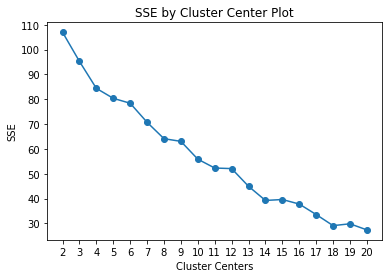

In [80]:
from sklearn.cluster import KMeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        #print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [86]:
model = MiniBatchKMeans(n_clusters= 6)

In [87]:
model.fit(text)

MiniBatchKMeans(n_clusters=6)

In [83]:
clusters = MiniBatchKMeans(n_clusters= 18).fit_predict(text)

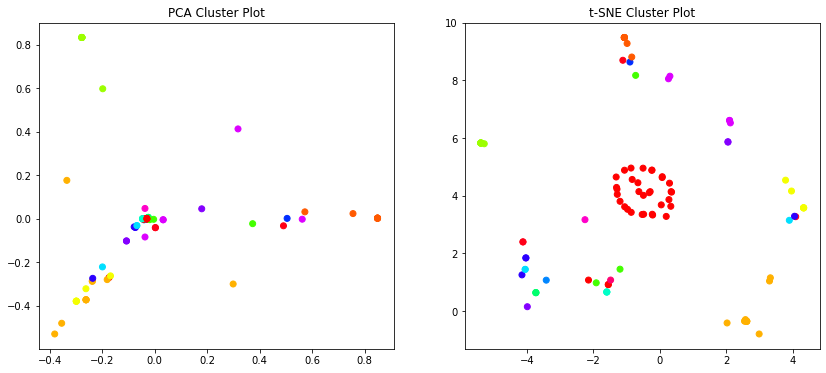

In [85]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=100, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=5).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('t-SNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [130]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' '\t' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 year	
 uk	
 johnson	
 bbc	
 giant	
 biggest	
 nasa	
 covid	
 home	
 friday	
Cluster 1:
 africa	
 new	
 countries	
 home	
 giant	
 friday	
 firms	
 energy	
 covid	
 company	
Cluster 2:
 world	
 new	
 variant	
 covid	
 news	
 said	
 years	
 company	
 friday	
 firms	


In [94]:
Y = tfidf.transform(["I have covid."])
prediction = model.predict(Y)
print(prediction)

[0]


In [127]:
Y = tfidf.transform(["New biggest home"])
prediction = model.predict(Y)
print(prediction)

[0]


In [102]:
Y = data.Document[110]
l = data.Label[110]
print(Y,l)

Manchester United have reached an agreement with Lokomotiv Moscow for the Russian club's head of sports and development Ralf Rangnick to move to Old Trafford as interim manager. Sports


In [106]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(data.Document)
features = vec.transform(data.Document)

In [114]:
cls = MiniBatchKMeans(n_clusters=6, random_state=5)
cls.fit(features)

MiniBatchKMeans(n_clusters=6, random_state=5)

In [115]:
cls.predict(features)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 5, 1, 5, 1, 1, 5], dtype=int32)

In [116]:
pca = PCA(n_components=2, random_state=5)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

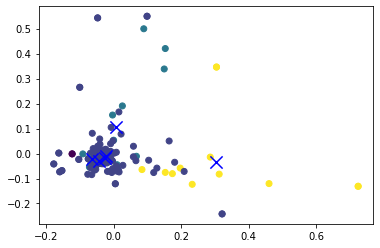

In [117]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [129]:
from sklearn.metrics import homogeneity_score
homogeneity_score(data.LabelNum, cls.predict(features))

0.05793220447994829

In [120]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.006401629255254912